In [268]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [269]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Sg = pd.read_csv('/content/drive/MyDrive/CSC_108/paper Proposal/filteredgames2.csv', header=0,index_col=False)
#cols =  list(range(1, 7)) + list(range(16,19)) + list(range(22,27)) + list(range(29,37))
#Sg = Sg.iloc[:,cols]
#Sg.to_csv('/content/drive/MyDrive/CSC_108/paper Proposal/filteredgames2.csv', index=False)
Sg
#Sample = Sg.sample(frac=.1, random_state=randomstate)
#Sample

,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Windows,Mac,Linux,Positive,...,Achievements,Recommendations,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
0,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,True,False,False,6,...,30,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
1,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,True,True,False,53,...,12,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,True,False,False,0,...,0,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN
3,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,True,True,True,3,...,0,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz..."
4,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,True,True,False,50,...,17,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111447,Paragon Of Time,"Apr 10, 2025",0 - 20000,0,0,2.99,True,False,False,5,...,0,0,0,0,0,Webcess,Webcess,"Single-player,Full controller support,Steam Cl...","Action,Casual,Indie","Action Roguelike,Bullet Hell,Hack and Slash,Ro..."
111448,A Few Days With : Hazel,"Apr 11, 2025",0 - 20000,0,0,2.69,True,False,False,0,...,7,0,0,0,0,Hentai Panda,Hentai Panda,"Single-player,Steam Achievements,Steam Cloud,F...","Casual,Indie",NaN
111449,MosGhost,"Apr 1, 2025",0 - 20000,0,0,7.99,True,False,False,24,...,0,0,0,0,0,Sinka Games,"Sinka Games,Arkuda Inc.","Single-player,Family Sharing",Simulation,"Simulation,Walking Simulator,Idler,First-Perso..."
111450,AccuBow VR,"Mar 11, 2025",0 - 0,0,0,0.00,True,False,False,0,...,0,0,0,0,0,AccuBow LLC,AccuBow LLC,"Single-player,Tracked Controller Support,VR On...","Action,Adventure,Free To Play",NaN


In [270]:
# Handle Random Sampling and not Bootstrapping
randomstate = 52  #
Sg = Sg.sample(frac=.2, random_state=randomstate)

In [271]:
# Suggestion for handling Release date column from Ai given the objectives of simplifying "Feb 03, 2020"
from datetime import datetime
Sg['Release date'] = pd.to_datetime(Sg['Release date'], errors='coerce')

Sg['release_year'] = Sg['Release date'].dt.year
Sg['release_month'] = Sg['Release date'].dt.month

In [272]:
print(Sg['Estimated owners'].unique())
Sg[Sg['Estimated owners'] == '10000000 - 20000000']

# Some cool games chosen

['20000 - 50000' '0 - 0' '0 - 20000' '100000 - 200000' '500000 - 1000000'
 '1000000 - 2000000' '200000 - 500000' '50000 - 100000'
 '2000000 - 5000000' '5000000 - 10000000' '20000000 - 50000000'
 '50000000 - 100000000' '10000000 - 20000000']


,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Windows,Mac,Linux,Positive,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,release_year,release_month
57666,Heroes & Generals,2016-10-18,10000000 - 20000000,1661,0,0.00,True,False,False,93513,...,61,75,73,TLM Partners,TLM Partners,"Multi-player,MMO,PvP,Online PvP,Co-op,Online C...","Action,Free to Play,Indie,Massively Multiplaye...","Free to Play,World War II,FPS,Multiplayer,War,...",2016.0,10.0
21472,Street Warriors Online,2016-12-16,10000000 - 20000000,0,0,1.99,True,False,False,966,...,0,26,0,Crazy Rocks Studios,Crazy Rocks Studios,"Multi-player,PvP,Online PvP,Steam Achievements...","Action,Massively Multiplayer,Simulation,Sports","Fighting,Action,Multiplayer,Sports,Violent,Mas...",2016.0,12.0
28170,Portal 2,2011-04-18,10000000 - 20000000,2693,0,9.99,True,True,True,298300,...,118,514,138,Valve,Valve,"Single-player,Multi-player,Co-op,Online Co-op,...","Action,Adventure","Platformer,Puzzle,Dark Humor,First-Person,Puzz...",2011.0,4.0
10923,Ring of Elysium,2019-06-24,10000000 - 20000000,564,0,0.00,True,False,False,74490,...,66,101,66,Aurora Studio,TCH Scarlet Limited,"Multi-player,PvP,Online PvP","Action,Free to Play,Massively Multiplayer","Free to Play,Battle Royale,Shooter,Multiplayer...",2019.0,6.0
8009,Cyberpunk 2077,2020-12-09,10000000 - 20000000,13739,17,59.99,True,False,False,391643,...,265,2420,148,CD PROJEKT RED,CD PROJEKT RED,"Single-player,Steam Achievements,Steam Trading...",RPG,"Cyberpunk,Open World,RPG,Nudity,Singleplayer,S...",2020.0,12.0
32247,Borderlands 2,2012-09-17,10000000 - 20000000,4910,17,19.99,True,True,True,247833,...,236,832,194,"Gearbox Software,Aspyr (Mac),Aspyr (Linux)","2K,Aspyr (Mac),Aspyr (Linux)","Single-player,Multi-player,Co-op,Steam Achieve...","Action,RPG","Loot,Shooter,Action,Multiplayer,Co-op,Looter S...",2012.0,9.0
39428,Counter-Strike,2000-11-01,10000000 - 20000000,13230,0,9.99,True,True,True,198387,...,1733,228,733,Valve,Valve,"Multi-player,PvP,Online PvP,Shared/Split Scree...",Action,"Action,FPS,Multiplayer,Shooter,Classic,Team-Ba...",2000.0,11.0


In [273]:
df = Sg

all_genres = []

for genres_str in df['Genres'].dropna():
  genres = [genre.strip() for genre in str(genres_str).split(',')]
  all_genres.extend(genres)

# Given Set can be used to remove duplicates of the same value.
unique_genres = set(all_genres)

print(f"Total unique genres found: {len(unique_genres)}")
print("All unique genres:")
for genre in unique_genres:
    print(f"{genre}")


Total unique genres found: 30
All unique genres:
Design & Illustration
Action
Racing
Free to Play
Game Development
Accounting
Utilities
Indie
Video Production
Violent
Strategy
Sexual Content
Photo Editing
Animation & Modeling
Sports
Movie
Casual
Short
Software Training
Audio Production
Adventure
Gore
Simulation
Early Access
Free To Play
Massively Multiplayer
Web Publishing
RPG
Nudity
Education


In [274]:
df = Sg


# The following implementation was written by Ai and then tweaked based on self requirements (mainly removing encoding features and adding Game genres)
# It required tweaking the implementation of encoding as well, as previously it implemented all Software_Genres and not just all Game_Genres.
Software_Genres = {
    'Accounting', 'Animation & Modeling', 'Audio Production',
    'Design & Illustration', 'Game Development', 'Photo Editing',
    'Software Training', 'Utilities', 'Video Production', 'Web Publishing',
    'Education','Tutorial','Documentary','Short',
}

Game_genres = {
    'Action', 'Adventure', 'Casual', 'Indie', 'Massively Multiplayer',
    'RPG', 'Racing', 'Simulation', 'Sports', 'Strategy',
    'Early Access', 'Free to Play', 'Gore', 'Nudity', 'Sexual Content', 'Violent',
    'Episodic'
}

# Create encoded dataframe
df_encoded = df.copy()

# Clean the Genres column
df_encoded['Genres'] = df_encoded['Genres'].apply(
    lambda x: str(x).replace('Free To Play', 'Free to Play') if pd.notna(x) else x
)

# Create binary columns ONLY for Game_genres
for genre in Game_genres:
    col_name = f'genre_{genre.replace(" ", "_").replace("-", "_").replace("&", "and")}'
    df_encoded[col_name] = df_encoded['Genres'].apply(
        lambda x: 1 if pd.notna(x) and genre in str(x) else 0
    )

# Create grouped features (only the three you want)
df_encoded['is_software'] = df_encoded['Genres'].apply(
    lambda x: 1 if pd.notna(x) and any(s in str(x) for s in Software_Genres) else 0
)

df_encoded['is_game'] = df_encoded['Genres'].apply(
    lambda x: 1 if pd.notna(x) and any(g in str(x) for g in Game_genres) else 0
)

df_encoded['num_genres'] = df_encoded['Genres'].apply(
    lambda x: len([g.strip() for g in str(x).split(',')]) if pd.notna(x) else 0
)

df_encoded.columns

Index(['Name', 'Release date', 'Estimated owners', 'Peak CCU', 'Required age',
       'Price', 'Windows', 'Mac', 'Linux', 'Positive', 'Negative',
       'Score rank', 'Achievements', 'Recommendations',
       'Average playtime two weeks', 'Median playtime forever',
       'Median playtime two weeks', 'Developers', 'Publishers', 'Categories',
       'Genres', 'Tags', 'release_year', 'release_month', 'genre_Strategy',
       'genre_Episodic', 'genre_Sexual_Content', 'genre_Action',
       'genre_Sports', 'genre_Casual', 'genre_Racing', 'genre_Free_to_Play',
       'genre_RPG', 'genre_Violent', 'genre_Adventure', 'genre_Gore',
       'genre_Indie', 'genre_Early_Access', 'genre_Massively_Multiplayer',
       'genre_Simulation', 'genre_Nudity', 'is_software', 'is_game',
       'num_genres'],
      dtype='object')

Logistic Regression Comparisons
                        feature  importance
23              Recommendations    4.013315
20                 release_year    0.675933
7            genre_Free_to_Play    0.320205
18                      is_game    0.286046
22                        Price    0.261577
3                  genre_Action    0.259733
19                   num_genres    0.214129
6                  genre_Racing    0.210752
10              genre_Adventure    0.192826
21                release_month    0.178499
8                     genre_RPG    0.175447
17                  is_software    0.165625
5                  genre_Casual    0.156521
14  genre_Massively_Multiplayer    0.155183
12                  genre_Indie    0.143593


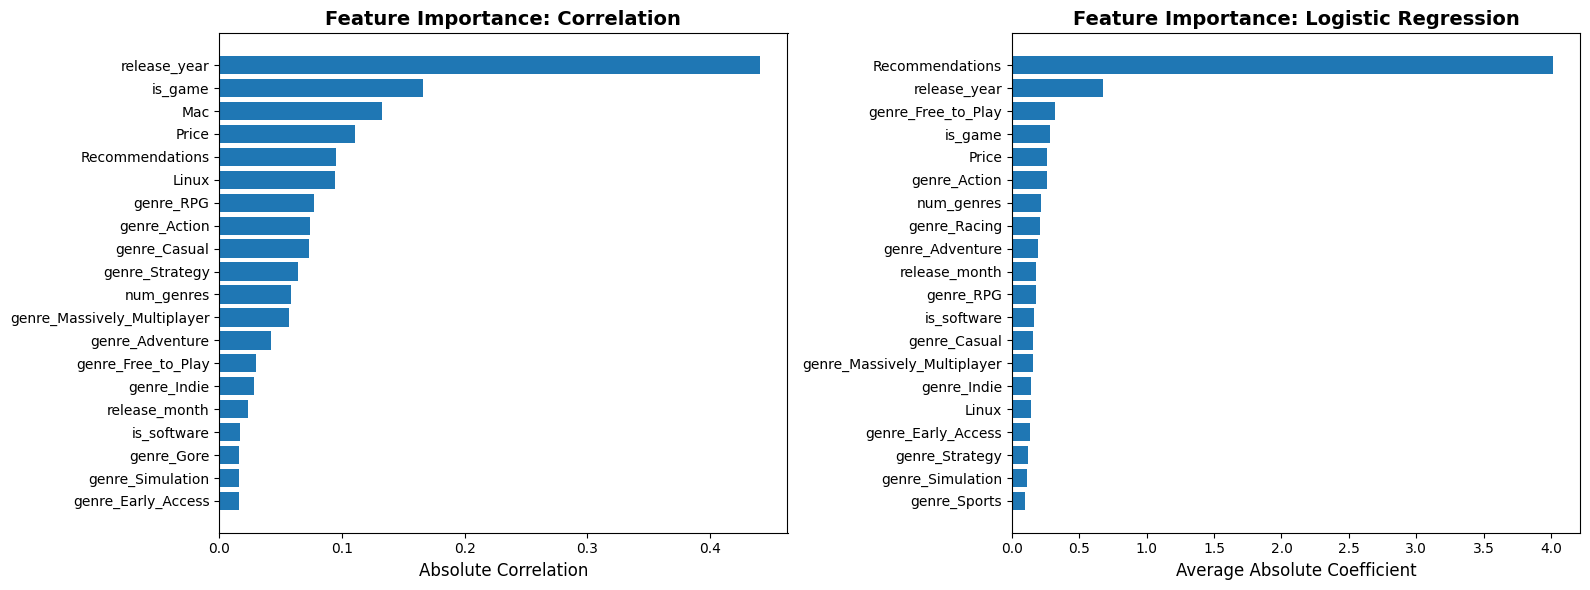

In [275]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

unique_owners = df_encoded['Estimated owners'].dropna().unique()
unique_owners_sorted = sorted(unique_owners)
target_mapping = {value: idx for idx, value in enumerate(unique_owners_sorted)}

df_encoded['target_numeric'] = df_encoded['Estimated owners'].map(target_mapping)
# Scale the features for better logistic regression coefficients
feature_cols = [col for col in df_encoded.columns if col.startswith('genre_')]
feature_cols += ['is_software', 'is_game', 'num_genres', 'release_year', 'release_month', 'Price', 'Recommendations','Windows','Mac','Linux']

X = df_encoded[feature_cols]
y = df_encoded['target_numeric']

# Remove NaN
mask = X.notna().all(axis=1) & y.notna()
X = X[mask]
y = y[mask]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

model_scaled = LogisticRegression(max_iter=250, random_state=42)
model_scaled.fit(X_train_scaled, y_train)

# AI suggestions (Once again, these suggestions are sometimes better than something I would imagine to think, especially with my limited knowledge on the subject)
coef_importance_scaled = np.abs(model_scaled.coef_).mean(axis=0)
feature_importance_scaled = pd.DataFrame({
    'feature': feature_cols,
    'importance': coef_importance_scaled
}).sort_values('importance', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

print("Logistic Regression Comparisons")
print(feature_importance_scaled.head(15))

# Plot 1: Correlation
correlations = df_encoded[feature_cols + ['target_numeric']].corr()['target_numeric'].drop('target_numeric')
correlations_top = correlations.abs().sort_values(ascending=False).head(20)
axes[0].barh(range(len(correlations_top)), correlations_top.values)
axes[0].set_yticks(range(len(correlations_top)))
axes[0].set_yticklabels(correlations_top.index)
axes[0].set_xlabel('Absolute Correlation', fontsize=12)
axes[0].set_title('Feature Importance: Correlation', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# Plot 2: Logistic Regression Coefficients
importance_top = feature_importance_scaled.head(20)
axes[1].barh(range(len(importance_top)), importance_top['importance'].values)
axes[1].set_yticks(range(len(importance_top)))
axes[1].set_yticklabels(importance_top['feature'])
axes[1].set_xlabel('Average Absolute Coefficient', fontsize=12)
axes[1].set_title('Feature Importance: Logistic Regression', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

Logistic Regression Comparisons
                        feature  importance
23              Recommendations    1.773907
19                   num_genres    0.523419
22                        Price    0.382611
15             genre_Simulation    0.230983
8                     genre_RPG    0.207162
10              genre_Adventure    0.186929
12                  genre_Indie    0.177360
0                genre_Strategy    0.173543
7            genre_Free_to_Play    0.168477
16                 genre_Nudity    0.160233
14  genre_Massively_Multiplayer    0.144176
24               target_numeric    0.142184
5                  genre_Casual    0.128009
17                  is_software    0.112035
13           genre_Early_Access    0.109611


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


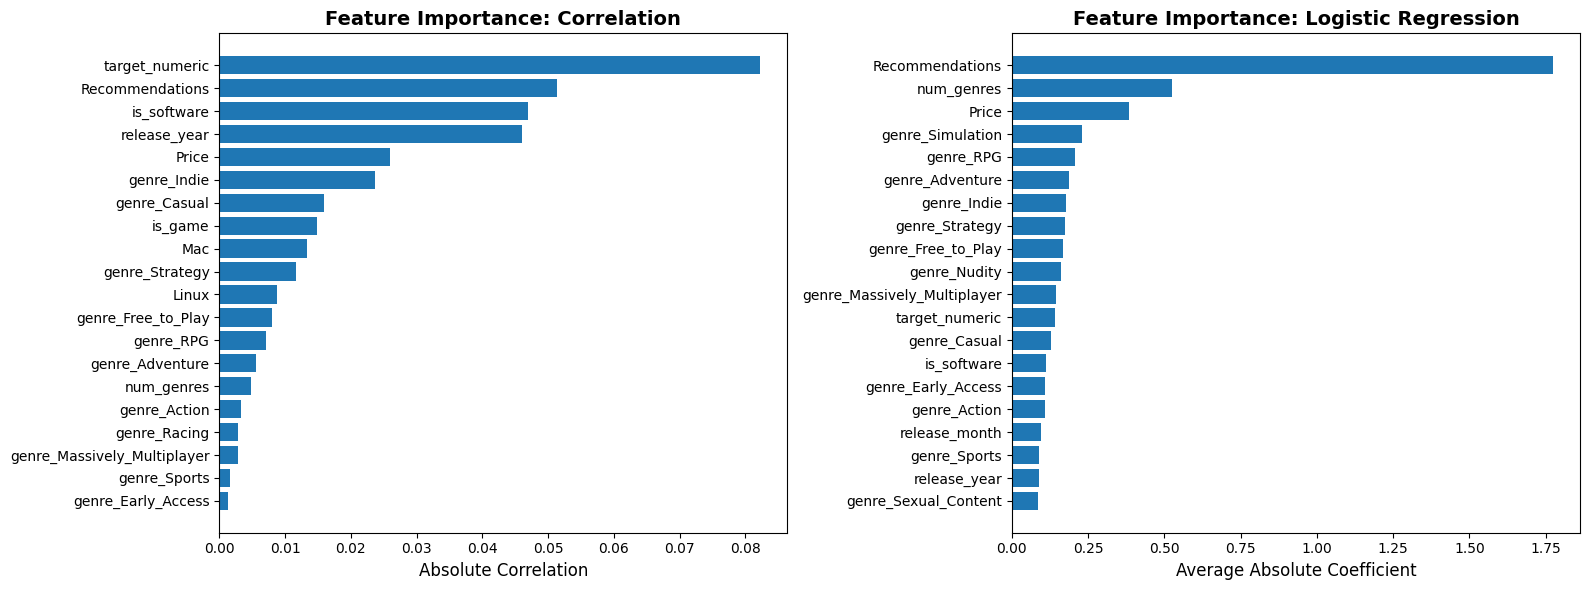

In [276]:
# Scale the features for better logistic regression coefficients
feature_cols = [col for col in df_encoded.columns if col.startswith('genre_')]
feature_cols += ['is_software', 'is_game', 'num_genres', 'release_year', 'release_month', 'Price', 'Recommendations','target_numeric','Windows','Mac','Linux']

df_encoded['playtime_category'] = pd.cut(
    df_encoded['Median playtime forever'],
    bins=[0, 30, 120, 600, 3000, float('inf')],
    labels=['Very Low (0-30min)', 'Low (30min-2hrs)', 'Medium (2-10hrs)', 'High (10-50hrs)', 'Very High (50hrs+)']
)

X = df_encoded[feature_cols]
y = df_encoded['playtime_category']

mask = X.notna().all(axis=1) & y.notna()
X = X[mask]
y = y[mask]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model_scaled = LogisticRegression(max_iter=150, random_state=42)
model_scaled.fit(X_train_scaled, y_train)

coef_importance_scaled = np.abs(model_scaled.coef_).mean(axis=0)
feature_importance_scaled = pd.DataFrame({
    'feature': feature_cols,
    'importance': coef_importance_scaled
}).sort_values('importance', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

print("Logistic Regression Comparisons")
print(feature_importance_scaled.head(15))

correlations = df_encoded[feature_cols].corrwith(df_encoded['Median playtime forever'])
correlations_top = correlations.abs().sort_values(ascending=False).head(20)
axes[0].barh(range(len(correlations_top)), correlations_top.values)
axes[0].set_yticks(range(len(correlations_top)))
axes[0].set_yticklabels(correlations_top.index)
axes[0].set_xlabel('Absolute Correlation', fontsize=12)
axes[0].set_title('Feature Importance: Correlation', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

importance_top = feature_importance_scaled.head(20)
axes[1].barh(range(len(importance_top)), importance_top['importance'].values)
axes[1].set_yticks(range(len(importance_top)))
axes[1].set_yticklabels(importance_top['feature'])
axes[1].set_xlabel('Average Absolute Coefficient', fontsize=12)
axes[1].set_title('Feature Importance: Logistic Regression', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

In [277]:
print(Sg['Recommendations'].unique())
Sg[Sg['Recommendations'] >= 500]

[    0   499   546 ... 12693  1878 12200]


,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Windows,Mac,Linux,Positive,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,release_year,release_month
42027,Particula,2015-02-02,500000 - 1000000,9,0,0.51,True,True,False,1541,...,0,353,0,Microblast Games,SA Industry,"Single-player,Multi-player,Co-op,Online Co-op,...","Casual,Indie,Strategy","Strategy,Indie,Tower Defense,Casual,Co-op,Sing...",2015.0,2.0
87519,Nightingale,2024-02-20,500000 - 1000000,36167,0,26.99,True,False,False,3946,...,0,0,0,Inflexion Games,Inflexion Games,"Single-player,Multi-player,Co-op,Online Co-op,...","Action,Adventure,RPG,Early Access","Early Access,Open World Survival Craft,Multipl...",2024.0,2.0
36753,Legend Creatures(传奇生物),2020-06-18,100000 - 200000,104,0,4.99,True,False,False,3217,...,0,670,0,HideChara,HideChara,"Single-player,Steam Achievements,Steam Worksho...","Casual,Indie,Strategy","Indie,Strategy,Casual,Rogue-lite,Auto Battler,...",2020.0,6.0
34230,Manual Samuel - Anniversary Edition,2016-10-14,500000 - 1000000,7,0,1.99,True,True,True,2131,...,0,214,0,Perfectly Paranormal,Curve Games,"Single-player,Multi-player,Co-op,Shared/Split ...","Adventure,Indie","Dark Humor,Singleplayer,Adventure,Local Co-Op,...",2016.0,10.0
13465,OutDrive,2016-02-22,200000 - 500000,6,0,2.99,True,False,False,3376,...,1,211,1,DNVR Prod,DNVR Prod,"Single-player,Steam Achievements,Steam Trading...","Casual,Indie,Racing","Racing,Indie,Casual,Retro,1980s,Music,Great So...",2016.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18731,Sid Meier's Civilization®: Beyond Earth™,2014-10-23,1000000 - 2000000,579,0,39.99,True,True,True,12323,...,0,860,0,"Firaxis Games,Aspyr (Mac),Aspyr (Linux)","2K,Aspyr (Mac),Aspyr (Linux)","Single-player,Multi-player,Steam Achievements,...",Strategy,"Strategy,Turn-Based Strategy,Sci-fi,Space,4X,T...",2014.0,10.0
12961,IL-2 Sturmovik: 1946,2008-06-13,0 - 20000,0,0,9.99,True,False,False,1355,...,0,0,0,1C: Maddox Games,1C Game Studios,"Single-player,Multi-player,Steam Cloud,Include...",Simulation,"Simulation,Flight,World War II,Military,Histor...",2008.0,6.0
34440,Block Story™,2015-12-10,50000 - 100000,16,0,2.99,True,False,False,878,...,0,384,0,"MindBlocks Studio, LLC","MindBlocks Studio, LLC","Single-player,Steam Achievements,Partial Contr...","Action,Adventure,Indie,RPG","RPG,Adventure,Open World Survival Craft,Sandbo...",2015.0,12.0
55951,Achievement Clicker,2017-11-17,100000 - 200000,3,0,0.99,True,False,False,1806,...,0,19,0,OfficialAndy,MGG Studio,"Single-player,Steam Achievements","Action,Adventure,Casual,Indie,Simulation,Strategy","Casual,Indie,Clicker,Strategy,Simulation,Actio...",2017.0,11.0


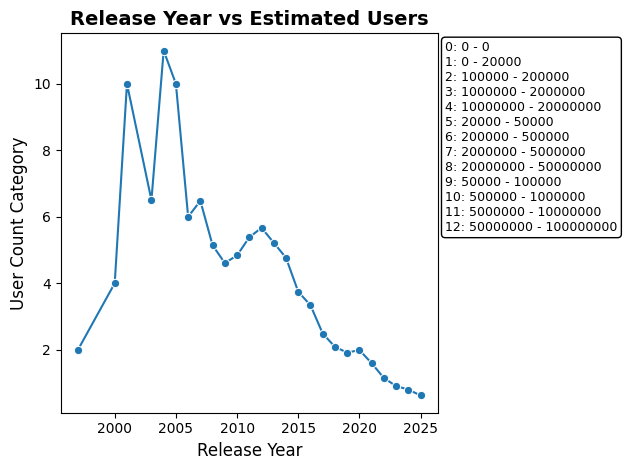

In [278]:

sns.lineplot(data=df_encoded, x='release_year', y='target_numeric', marker='o', errorbar=None)

# Ai given prompt "Given Target_numeric with the code (Insert Target mapping code here), would it be possible to add a key of the variables in a plot?"
legend_text = '\n'.join([f"{v}: {k}" for k, v in sorted(target_mapping.items(), key=lambda x: x[1])])
# To try and make sense of the code, I have no idea what is going on so I'll try to simplify what I percieve.
# Position is set by going past 1 potentially, I'd imagine generation is based on the top left of the object, X,Y.
# legend_text is the applied mapping items, as previously gone over.
# I genuinely have no clue how the transform function works, I believe it is to prevent it from making the graph, or the box to not be part of the plot
# Using AI asking why it's implemented like this and what it does, I believe it allows it to always stay on the top right edge, such that new values wouldn't affect the plot.
# Box style Round makes rounded edges, facecolor is color on the back Initially was "Wheat" or a light yellow.
plt.text(1.02, 0.98, legend_text, transform=plt.gca().transAxes, fontsize=9, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white'))

plt.xlabel('Release Year', fontsize=12)
plt.ylabel('User Count Category', fontsize=12)
plt.title('Release Year vs Estimated Users', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Release year steadily decreases estimated users which should be expected.

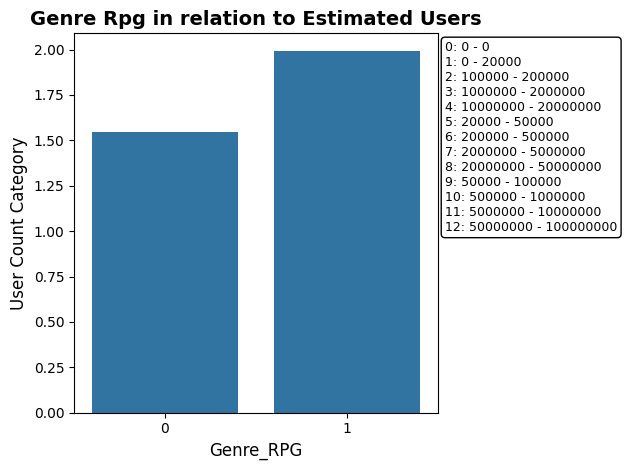

In [279]:
sns.barplot(data=df_encoded, x='genre_RPG', y='target_numeric', errorbar=None)

legend_text = '\n'.join([f"{v}: {k}" for k, v in sorted(target_mapping.items(), key=lambda x: x[1])])
plt.text(1.02, 0.98, legend_text, transform=plt.gca().transAxes, fontsize=9, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white'))

plt.xlabel('Genre_RPG', fontsize=12)
plt.ylabel('User Count Category', fontsize=12)
plt.title('Genre Rpg in relation to Estimated Users', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Small difference between RPG genre and users

/tmp/ipython-input-515484832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_filter['target_numeric'] = df_encoded['target_numeric']


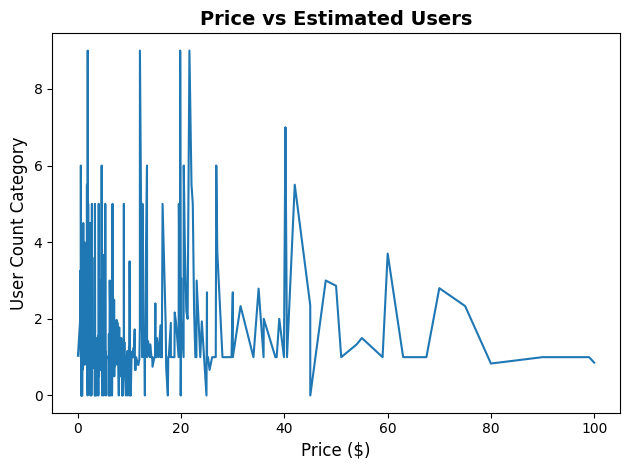

In [280]:
# I would not like to create seperate values for price ranges and get averages, therefore I am just going to use the flat graph.
price_filter = df_encoded[df['Price'] <= 100]
price_filter['target_numeric'] = df_encoded['target_numeric']
sns.lineplot(data=price_filter, x='Price', y='target_numeric', errorbar=None)\

plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('User Count Category', fontsize=12)
plt.title('Price vs Estimated Users', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#We still see a correlation with Price and User Count



<Axes: xlabel='playtime_category', ylabel='Recommendations'>

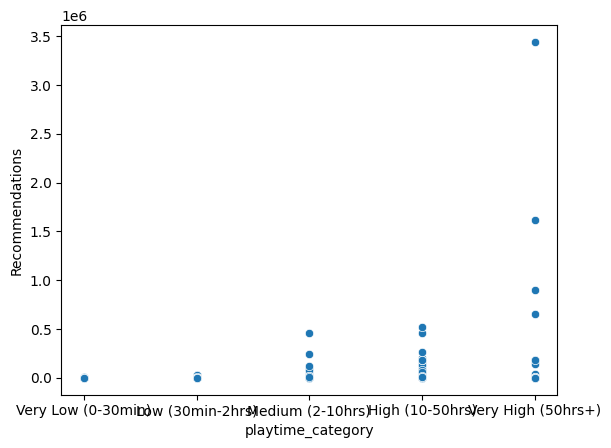

In [285]:
sns.scatterplot(data=df_encoded, x='playtime_category', y='Recommendations')

# This shows that it is very likely that recommendations are affected hugely by outliers, and is why the correlation
# for the logistic regression model with it may be so high.
